In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df1 = pd.read_csv('/Users/rodney/Documents/Jupyter/HW_IE_691/HW_1/PCD_Train_2.csv')
df2 = pd.read_csv('/Users/rodney/Documents/Jupyter/HW_IE_691/HW_1/PCD_Test_2.csv')

df1 = df1.drop(columns=['train'])
df2 = df2.drop(columns=['train'])

# NOTE:
## These next two shells center the data for the train and test sets

In [3]:
df1 = df1.apply(lambda x: x-x.mean())
df1 = df1.subtract(df1.mean())

In [4]:
df2 = df2.apply(lambda x: x-x.mean())
df2 = df2.subtract(df2.mean())

In [5]:
X_train = df1[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]#.values
y_train = df1['lpsa']#.values

X_test = df2[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]#.values
y_test = df2['lpsa']#.values

print (X_train)
print (y_train)
# print (X_test)
# print (y_test)

      lcavol   lweight        age      lbph       svi       lcp   gleason  \
0  -1.893310 -0.856649 -14.746269 -1.457734 -0.223881 -1.172091 -0.731343   
1  -2.307744 -0.306482  -6.746269 -1.457734 -0.223881 -1.172091 -0.731343   
2  -1.824317 -0.934865   9.253731 -1.457734 -0.223881 -1.172091  0.268657   
3  -2.517464 -0.343319  -6.746269 -1.457734 -0.223881 -1.172091 -0.731343   
4  -0.562075 -0.193735  -2.746269 -1.457734 -0.223881 -1.172091 -0.731343   
5  -2.363314 -0.397282 -14.746269 -1.457734 -0.223881 -1.172091 -0.731343   
6  -0.620344 -0.086599  -6.746269  1.465427 -0.223881 -1.172091 -0.731343   
7  -1.058849 -0.021970   0.253731 -1.457734 -0.223881 -1.172091 -0.731343   
8  -2.660565 -0.027427  -1.746269  1.195508 -0.223881 -1.172091 -0.731343   
9   0.299938 -0.603247  -1.746269 -1.457734 -0.223881 -0.383634  0.268657   
10  0.163557 -0.627879   2.253731 -1.457734 -0.223881 -1.172091  0.268657   
11  0.227668 -0.565056   1.253731 -1.457734 -0.223881 -1.172091 -0.731343   

Text(0.5,0,'-log(alpha)')

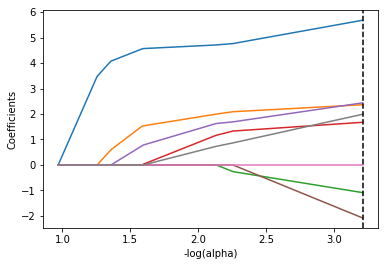

In [6]:
# Lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(X_train,y_train)

# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Coefficients')
plt.xlabel('-log(alpha)')